In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('../../data/annclassification/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df = df.drop(columns='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

1. No Null values in the data
2. Target column is imbalanced
3. Dataset is mixture of numerical and categorical values(so need to convert non numerical cols into numerical cols)

now lets start with univariate analysis

In [7]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [8]:
df.groupby('Exited')['CustomerId'].mean()

Exited
0    1.569117e+07
1    1.569005e+07
Name: CustomerId, dtype: float64

<Axes: xlabel='Exited', ylabel='CustomerId'>

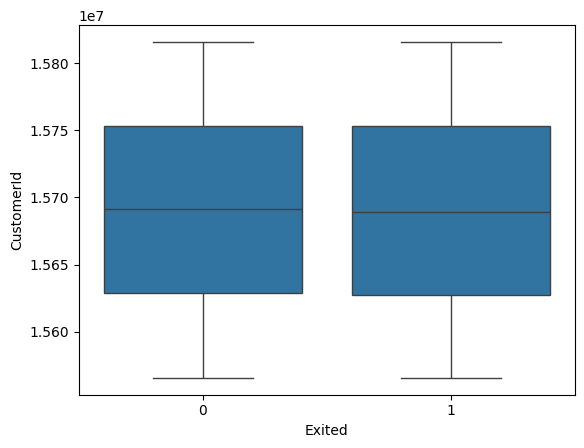

In [9]:
sns.boxplot(df,x='Exited',y='CustomerId')

In [10]:
customer_id_1 = df[df['Exited'] == 1]['CustomerId']
customer_id_0 = df[df['Exited'] == 0]['CustomerId']

In [11]:
t_stats,p_value = stats.ttest_ind(customer_id_0,customer_id_1)
print(t_stats,p_value)

0.6247483751661382 0.532150474760025


it was quite obvious but the above test made it clear that the feature is not usefull so are dropping the col 

In [12]:
df = df.drop(columns=['CustomerId'])
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Exited', ylabel='CreditScore'>

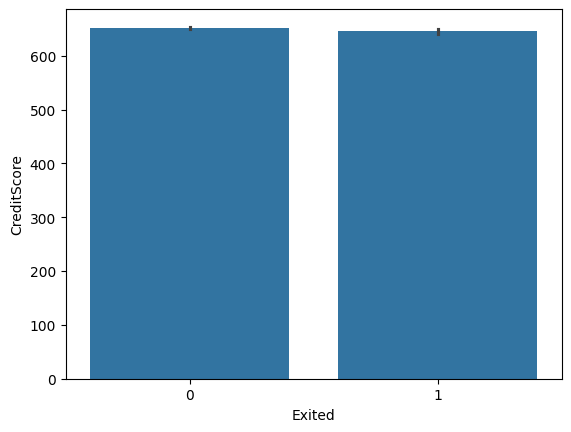

In [13]:
sns.barplot(df,x='Exited',y='CreditScore')

<Axes: xlabel='Exited', ylabel='CreditScore'>

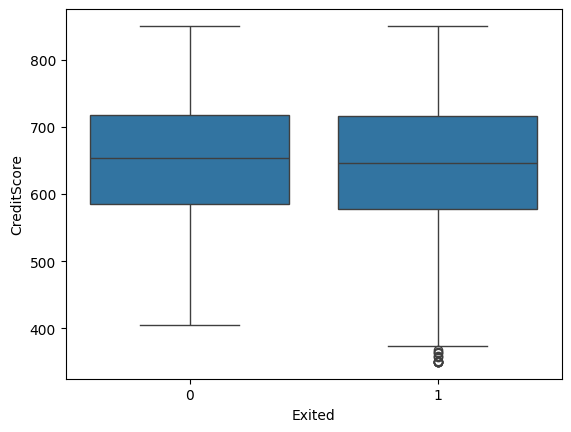

In [14]:
sns.boxplot(df,x='Exited',y='CreditScore')

In [15]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [16]:
df.groupby('Exited')['CreditScore'].median()

Exited
0    653.0
1    646.0
Name: CreditScore, dtype: float64

In [17]:
credit_score_1 = df[df['Exited'] == 1]['CreditScore']
credit_score_0 = df[df['Exited'] == 0]['CreditScore']

In [18]:
t_stats,p_value = stats.ttest_ind(credit_score_0,credit_score_1)
print(t_stats,p_value)

2.7100778888729833 0.006738213892192373


from the above analysis people with all kind of credit score has exited and also not exited but still creditscore can be a good factor so we will keep this column 

In [19]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [20]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [21]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [22]:
df.groupby('Exited')['Age'].median()

Exited
0    36.0
1    45.0
Name: Age, dtype: float64

<Axes: xlabel='Exited', ylabel='Age'>

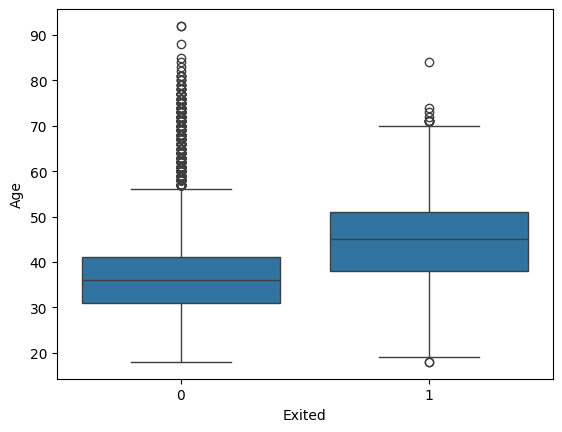

In [23]:
sns.boxplot(df,x='Exited',y='Age')

<Axes: xlabel='Age', ylabel='Density'>

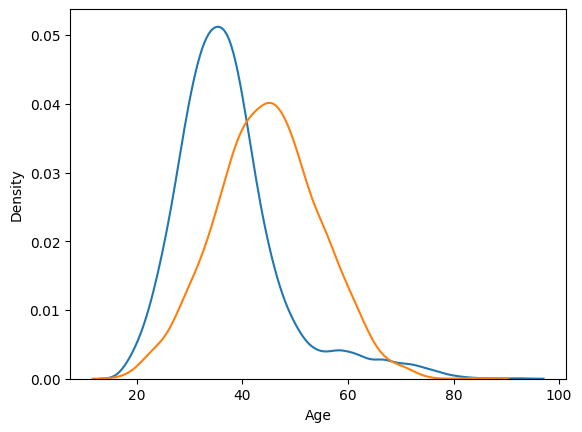

In [24]:
sns.kdeplot(df[df['Exited']==0]['Age'], label="Stayed (0)")
sns.kdeplot(df[df['Exited']==1]['Age'], label="Exited (1)")


In [25]:
age_exited = df[df['Exited']==1]['Age']
age_not_exited = df[df['Exited']==0]['Age']

t_stat, p_value = stats.ttest_ind(age_not_exited, age_exited)
print(t_stat, p_value)

-29.76681499437077 1.2399313093427736e-186


from the above anylysis it can be interpreted that people with older age group exited more then the youger age group so this can be a good feature help classification 

In [26]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [27]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [28]:
df.groupby('Exited')['Tenure'].mean()

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64

In [29]:
df.groupby('Exited')['Tenure'].median()

Exited
0    5.0
1    5.0
Name: Tenure, dtype: float64

<Axes: xlabel='Exited', ylabel='Tenure'>

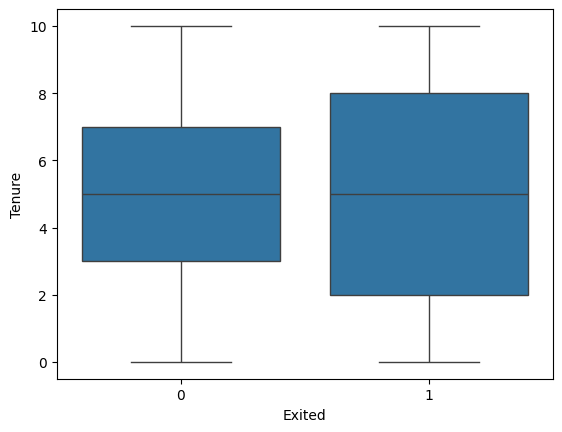

In [30]:
sns.boxplot(df,x='Exited',y='Tenure')

<Axes: xlabel='Tenure', ylabel='Density'>

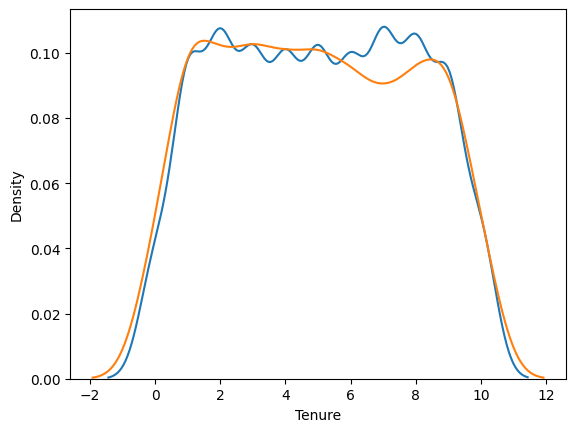

In [31]:

sns.kdeplot(df[df['Exited']==0]['Tenure'], label="Stayed (0)")
sns.kdeplot(df[df['Exited']==1]['Tenure'], label="Exited (1)")


In [32]:
age_exited = df[df['Exited']==1]['Tenure']
age_not_exited = df[df['Exited']==0]['Tenure']

t_stat, p_value = stats.ttest_ind(age_not_exited, age_exited)
print(t_stat, p_value)

1.4000584366735584 0.16152684949473256


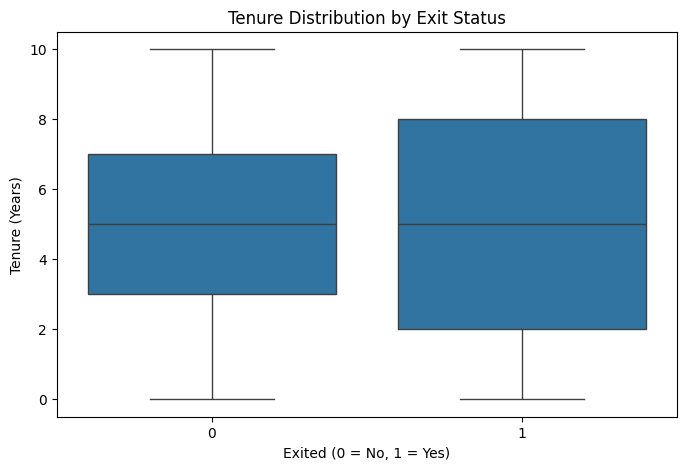

In [33]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure Distribution by Exit Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Years)')
plt.show()


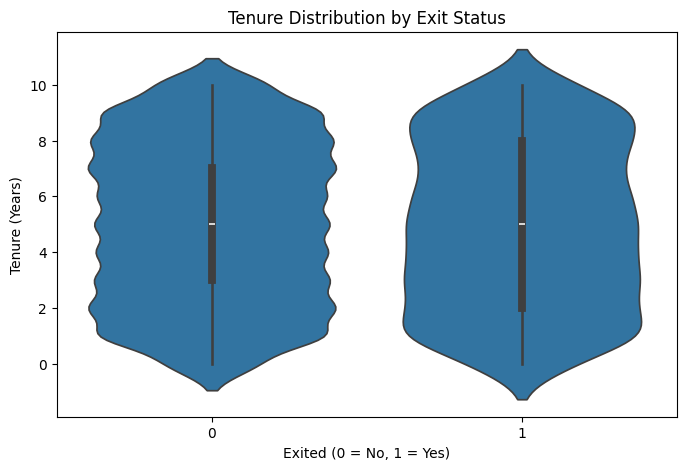

In [34]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure Distribution by Exit Status')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Years)')
plt.show()


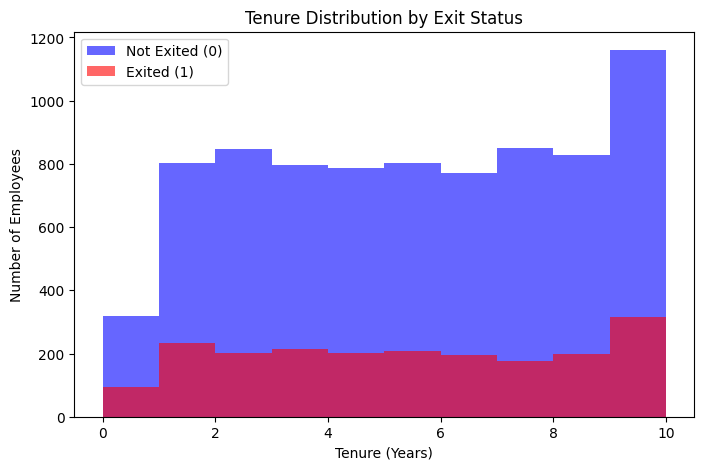

In [35]:

# Separate the two groups
tenure_exited = df[df['Exited'] == 1]['Tenure']
tenure_not_exited = df[df['Exited'] == 0]['Tenure']

plt.figure(figsize=(8,5))

# Plot histograms
plt.hist(tenure_not_exited, bins=10, alpha=0.6, label='Not Exited (0)', color='blue')
plt.hist(tenure_exited, bins=10, alpha=0.6, label='Exited (1)', color='red')

plt.title('Tenure Distribution by Exit Status')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()


from the above anylysis it can be interpreted that people with older age group exited more then the youger age group so this can be a good feature help classification 

In [36]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [37]:
df.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [38]:

df.groupby('Exited')['Balance'].median()

Exited
0     92072.68
1    109349.29
Name: Balance, dtype: float64

<Axes: xlabel='Exited', ylabel='Balance'>

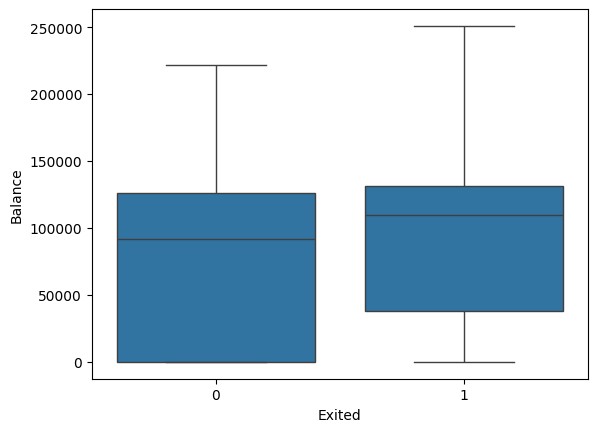

In [39]:
sns.boxplot(df,x='Exited',y='Balance')

<Axes: xlabel='Exited', ylabel='Balance'>

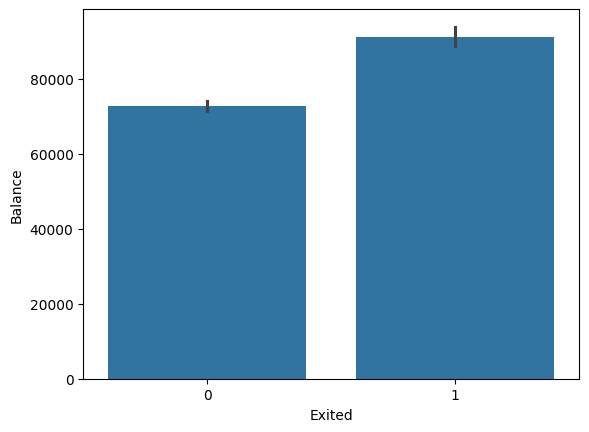

In [40]:
sns.barplot(df,x='Exited',y='Balance')

In [41]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [42]:
df.groupby('Exited')['NumOfProducts'].mean()



Exited
0    1.544267
1    1.475209
Name: NumOfProducts, dtype: float64

In [43]:
df.groupby('Exited')['NumOfProducts'].median()

Exited
0    2.0
1    1.0
Name: NumOfProducts, dtype: float64

In [44]:
df.NumOfProducts.unique()

array([1, 3, 2, 4])

<Axes: xlabel='NumOfProducts', ylabel='count'>

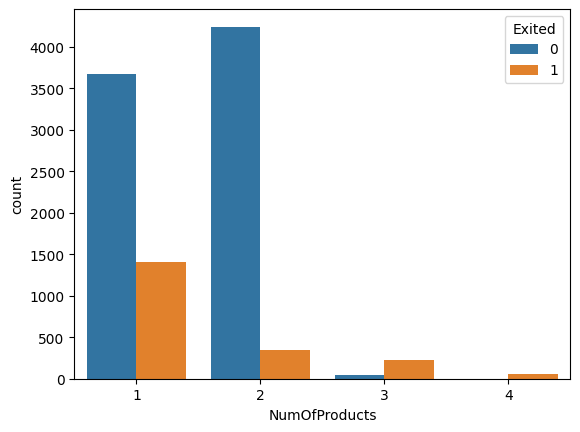

In [45]:
sns.countplot(df,x='NumOfProducts',hue='Exited')

In [46]:
# Create a cross-tabulation
contingency_table = pd.crosstab(df['NumOfProducts'], df['Exited'])
print(contingency_table)

Exited            0     1
NumOfProducts            
1              3675  1409
2              4242   348
3                46   220
4                 0    60


In [47]:
chi2,p_value,dof,expected = stats.chi2_contingency(contingency_table)
print(chi2,p_value,dof,expected)

1503.6293615070408 0.0 3 [[4048.3892 1035.6108]
 [3655.017   934.983 ]
 [ 211.8158   54.1842]
 [  47.778    12.222 ]]


In [48]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


<Axes: xlabel='HasCrCard', ylabel='count'>

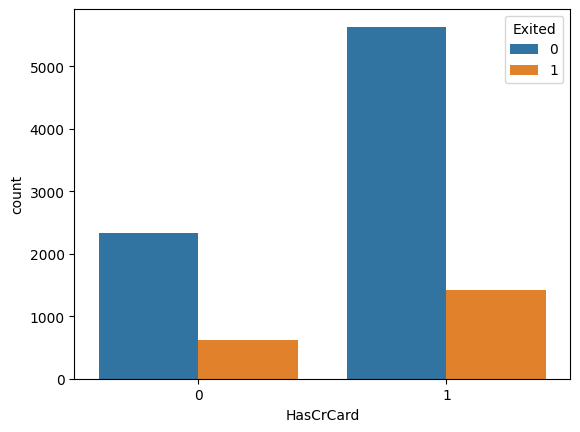

In [49]:
sns.countplot(df,x='HasCrCard',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

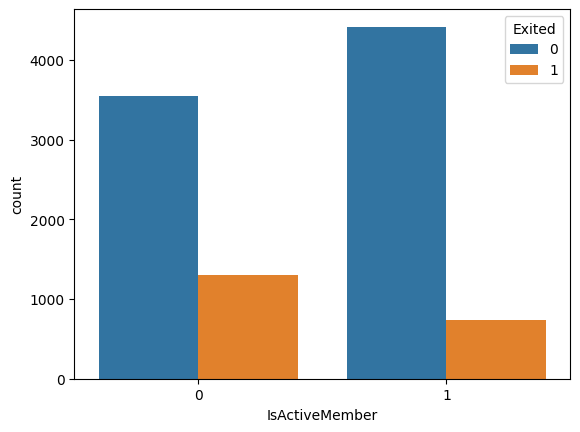

In [50]:
sns.countplot(df,x='IsActiveMember',hue='Exited')

In [51]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


from the above analysis we can conclude that Surname is also not a use full feature so we will drop that also and the after that we will have to final dataset which we can use for predections

In [52]:
df = df.drop(columns=['Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [53]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [55]:

df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Multivariate Analysis

In [62]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df[['Geo']]

In [65]:
len(df.Gender.value_counts())

2

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [69]:
categorical_var = [col  for col in df.columns if len(df[col].value_counts()) <= 5]
categorical_var

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [70]:
df[categorical_var]

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1,1
1,Spain,Female,1,0,1,0
2,France,Female,3,1,0,1
3,France,Female,2,0,0,0
4,Spain,Female,1,1,1,0
...,...,...,...,...,...,...
9995,France,Male,2,1,0,0
9996,France,Male,1,1,1,0
9997,France,Female,1,0,1,1
9998,Germany,Male,2,1,0,1


In [78]:
for col in categorical_var[2:-1]:
    contingency = pd.crosstab(df[col], df['Exited'])
    chi2,p_value,dof,expected = stats.chi2_contingency(contingency)
    print(f"{col} : {p_value} ")

NumOfProducts : 0.0 
HasCrCard : 0.49237236141554686 
IsActiveMember : 8.785858269303703e-55 


In [80]:
import statsmodels.formula.api as smf

model = smf.logit("Exited ~ C(Geography) + C(Gender) + C(NumOfProducts) + C(HasCrCard) + C(IsActiveMember)", data=df).fit()
print(model.summary())


         Current function value: 0.407736
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                  0.1934
Time:                        14:28:08   Log-Likelihood:                -4077.4
converged:                      False   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5512      0.072     -7.666      0.000      -0.692      -0.410
C(Geography)[T.Germany]   

/home/mahavir/code/python_projects/ml_dl_projects/1_customer_churning/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example dataframe (replace with your dataset)
# df = pd.read_csv("your_file.csv")

# Make sure all variables are treated as categorical
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['NumOfProducts'] = df['NumOfProducts'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')

# --------------------------
# LOG-LINEAR MODEL
# --------------------------
# A log-linear model is just a Poisson regression applied to the contingency table
# Here we model frequencies of combinations of categorical variables

# Step 1: Create contingency table for all categorical variables
contingency = pd.crosstab(
    [df['Geography'], df['Gender'], df['NumOfProducts'], df['HasCrCard'], df['IsActiveMember']],
    df['Exited']
)

# Step 2: Convert to long format
contingency = contingency.reset_index().melt(
    id_vars=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'],
    var_name='Exited',
    value_name='count'
)

# Step 3: Fit log-linear model (Poisson regression)
model = smf.glm(
    formula="count ~ Geography + Gender + NumOfProducts + HasCrCard + IsActiveMember + Exited + Geography:Exited + Gender:Exited + NumOfProducts:Exited + HasCrCard:Exited + IsActiveMember:Exited",
    data=contingency,
    family=sm.families.Poisson()
).fit()

print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  178
Model:                            GLM   Df Residuals:                      160
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -462.79
Date:                Sun, 07 Sep 2025   Deviance:                       170.16
Time:                        14:32:02   Pearson chi2:                     165.
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [82]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [89]:
encoded_df = pd.get_dummies(df[['Geography','Gender']],dtype='int')
encoded_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [92]:
df = df.drop(columns=['Geography','Gender'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [101]:

final_df = pd.concat([df,encoded_df],axis=1)
final_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [108]:
X = df.drop(columns=['Exited'])
y = df.Exited

In [114]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [120]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [121]:
final_df.to_csv('../processed_data/processed_data.csv')

In [122]:
final_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1
